# Flight Crash Fatality

In [1]:
#Installing the scikit learn library

In [2]:
!pip install scikit-learn

In [3]:
#Importing the necessary library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [5]:
#Importing the CSV Flight dataset.

In [6]:
df=pd.read_csv(r"C:\Users\Nargi\OneDrive\Desktop\New folder\edunet\project\flight.csv")

In [7]:
df

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [8]:
#Cheacking the duplicate data.

In [9]:
df.duplicated().value_counts()

False    1250
True     1250
dtype: int64

In [10]:
#Removing the duplicate data.

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
#Conforming the removal of duplicate data.

In [13]:
df.duplicated().value_counts()

False    1250
dtype: int64

In [14]:
# Checking the information of the Data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1250 non-null   int64 
 1   acc.date    1250 non-null   object
 2   type        1250 non-null   object
 3   reg         1204 non-null   object
 4   operator    1243 non-null   object
 5   fat         1244 non-null   object
 6   location    1250 non-null   object
 7   dmg         1250 non-null   object
dtypes: int64(1), object(7)
memory usage: 87.9+ KB


In [16]:
#Finding the number of null value in every column.

In [17]:
df.isnull().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           46
operator       7
fat            6
location       0
dmg            0
dtype: int64

In [18]:
#Finding Top 10 organition which are involve in crash.

In [19]:
AirlineComp=df.operator.value_counts().sort_values(ascending=False).head(10)

In [20]:
AirlineComp

private               103
American Airlines      22
Delta Air Lines        22
Unknown                19
United Airlines        18
Southwest Airlines     18
Ryanair                11
Air Canada              8
Emirates                7
Korean Air              6
Name: operator, dtype: int64

In [21]:
#Listing the name of top ten organisation.

In [22]:
AirlineComp=AirlineComp.index

In [23]:
AirlineComp

Index(['private', 'American Airlines', 'Delta Air Lines', 'Unknown',
       'United Airlines', 'Southwest Airlines', 'Ryanair', 'Air Canada',
       'Emirates', 'Korean Air'],
      dtype='object')

In [24]:
len(AirlineComp)

10

In [25]:
#Reset the index of the flight dataset.

In [26]:
new_df=df.set_index("operator")
new_df

,Unnamed: 0,acc.date,type,reg,fat,location,dmg
operator,,,,,,,
SA Airlink,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,0,near Venetia Mine Airport,sub
LANHSA - Línea Aérea Nacional de Honduras S.A,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
Caspian Airlines,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,0,Isfahan-Shahid Beheshti Airport (IFN),sub
"Cainiao, opb Aviastar-TU",3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,0,Hangzhou Xiaoshan International Airport (HGH),w/o
private,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
Chen Aircrafts LLC,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
Guardia Nacional Bolivariana de Venezuela - GNBV,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,0,Kamarata Airport (KTV),sub
Air Force of the Democratic Republic of the Congo,1247,24 Dec 2018,Antonov An-26B,9T-TAB,0,Beni Airport (BNC),w/o


In [27]:
#Filter the dateset with list of top 10 organisation.

In [28]:
new_flightDataset=new_df.loc[AirlineComp]

In [29]:
#Finding the number of rows and columns in filtered dataset.

In [30]:
new_flightDataset.shape

(234, 7)

In [31]:
#Changing the name of the index.

In [32]:
new_flightDataset.index.name="organisation"

In [33]:
#Resetting the index.

In [34]:
new_flightDataset.reset_index(inplace=True)

In [35]:
#Checking the filtered dataset

In [36]:
new_flightDataset

,organisation,Unnamed: 0,acc.date,type,reg,fat,location,dmg
0,private,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,0,"Machakilha, Toledo District, Grahem Creek area",w/o
1,private,57,13 Apr 2022,Gulfstream American G-1159 Gulfstream II B,N511PK,0,within Venezuela,w/o
2,private,95,22 Jun 2022,Learjet 55C,YV3304,6,7 km SSE of Charallave-Óscar Machado Zuloaga A...,w/o
3,private,108,15 Jul 2022,Antonov An-2R,RA-02240,2,"Prochnookopskaya, Novokubansky district, Krasn...",sub
4,private,151,21 Sep 2022,Rockwell Sabreliner 65,XB-RXG,0,within Zulia,w/o
...,...,...,...,...,...,...,...,...
229,Korean Air,173,23 Oct 2022,Airbus A330-322,HL7525,0,Mactan-Cebu International Airport (CEB),sub
230,Korean Air,762,13 May 2019,Boeing 737-9B5,HL7726,0,30NM W of Incheon International Airport,non
231,Korean Air,924,16 Nov 2019,Boeing 777-3B5ER,HL7204,0,Frankfurt International Airport (FRA/EDDF),sub
232,Korean Air,1037,9 Apr 2018,Boeing 737-9B5,HL7725,0,Osaka-Kansai International Airport (KIX),sub


In [37]:
#Removing the unwanted colunms.

In [38]:
flightData=new_flightDataset.drop(["Unnamed: 0","type","reg","location","dmg"],axis=1)

In [39]:
flightData

,organisation,acc.date,fat
0,private,12 Jan 2022,0
1,private,13 Apr 2022,0
2,private,22 Jun 2022,6
3,private,15 Jul 2022,2
4,private,21 Sep 2022,0
...,...,...,...
229,Korean Air,23 Oct 2022,0
230,Korean Air,13 May 2019,0
231,Korean Air,16 Nov 2019,0
232,Korean Air,9 Apr 2018,0


In [40]:
#Checking the information of filtered dataset.

In [41]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   organisation  234 non-null    object
 1   acc.date      234 non-null    object
 2   fat           231 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


In [42]:
#Removing the null values.

In [43]:
flightData=flightData.dropna()

In [44]:
#Checking the shape of filter data.

In [45]:
flightData.shape

(231, 3)

In [46]:
#Converting the data type of accident date column.

In [47]:
flightData['accident_date'] = pd.to_datetime(flightData['acc.date'], errors='coerce')

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\2658735239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData['accident_date'] = pd.to_datetime(flightData['acc.date'], errors='coerce')


In [48]:
flightData

,organisation,acc.date,fat,accident_date
0,private,12 Jan 2022,0,2022-01-12
1,private,13 Apr 2022,0,2022-04-13
2,private,22 Jun 2022,6,2022-06-22
3,private,15 Jul 2022,2,2022-07-15
4,private,21 Sep 2022,0,2022-09-21
...,...,...,...,...
229,Korean Air,23 Oct 2022,0,2022-10-23
230,Korean Air,13 May 2019,0,2019-05-13
231,Korean Air,16 Nov 2019,0,2019-11-16
232,Korean Air,9 Apr 2018,0,2018-04-09


In [49]:
#Extracting new feature.

In [50]:
flightData['Accident_Year'] = flightData['accident_date'].dt.year

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\3321447784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData['Accident_Year'] = flightData['accident_date'].dt.year


In [51]:
flightData

,organisation,acc.date,fat,accident_date,Accident_Year
0,private,12 Jan 2022,0,2022-01-12,2022.0
1,private,13 Apr 2022,0,2022-04-13,2022.0
2,private,22 Jun 2022,6,2022-06-22,2022.0
3,private,15 Jul 2022,2,2022-07-15,2022.0
4,private,21 Sep 2022,0,2022-09-21,2022.0
...,...,...,...,...,...
229,Korean Air,23 Oct 2022,0,2022-10-23,2022.0
230,Korean Air,13 May 2019,0,2019-05-13,2019.0
231,Korean Air,16 Nov 2019,0,2019-11-16,2019.0
232,Korean Air,9 Apr 2018,0,2018-04-09,2018.0


In [52]:
#Extracting new feature.

In [53]:
flightData['Accident_Month'] = flightData['accident_date'].dt.month

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\2332771335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData['Accident_Month'] = flightData['accident_date'].dt.month


In [54]:
flightData

,organisation,acc.date,fat,accident_date,Accident_Year,Accident_Month
0,private,12 Jan 2022,0,2022-01-12,2022.0,1.0
1,private,13 Apr 2022,0,2022-04-13,2022.0,4.0
2,private,22 Jun 2022,6,2022-06-22,2022.0,6.0
3,private,15 Jul 2022,2,2022-07-15,2022.0,7.0
4,private,21 Sep 2022,0,2022-09-21,2022.0,9.0
...,...,...,...,...,...,...
229,Korean Air,23 Oct 2022,0,2022-10-23,2022.0,10.0
230,Korean Air,13 May 2019,0,2019-05-13,2019.0,5.0
231,Korean Air,16 Nov 2019,0,2019-11-16,2019.0,11.0
232,Korean Air,9 Apr 2018,0,2018-04-09,2018.0,4.0


In [55]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 233
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   organisation    231 non-null    object        
 1   acc.date        231 non-null    object        
 2   fat             231 non-null    object        
 3   accident_date   230 non-null    datetime64[ns]
 4   Accident_Year   230 non-null    float64       
 5   Accident_Month  230 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 12.6+ KB


In [56]:
flightData.dropna(inplace=True)

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\1569061273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData.dropna(inplace=True)


In [57]:
#Removing  unused column.

In [58]:
flightData.drop("acc.date",axis=1,inplace=True)

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\1483760926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData.drop("acc.date",axis=1,inplace=True)


In [59]:
flightData

,organisation,fat,accident_date,Accident_Year,Accident_Month
0,private,0,2022-01-12,2022.0,1.0
1,private,0,2022-04-13,2022.0,4.0
2,private,6,2022-06-22,2022.0,6.0
3,private,2,2022-07-15,2022.0,7.0
4,private,0,2022-09-21,2022.0,9.0
...,...,...,...,...,...
229,Korean Air,0,2022-10-23,2022.0,10.0
230,Korean Air,0,2019-05-13,2019.0,5.0
231,Korean Air,0,2019-11-16,2019.0,11.0
232,Korean Air,0,2018-04-09,2018.0,4.0


In [60]:
#Ploting bar graph of fatality and organistion.

<BarContainer object of 230 artists>

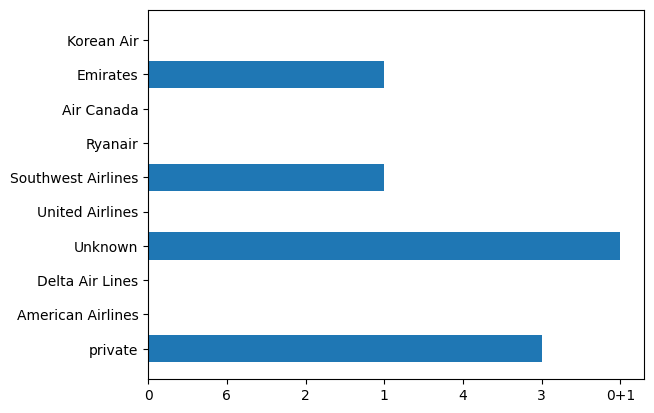

In [61]:
plt.barh(flightData["organisation"],flightData["fat"])

In [62]:
#Evaluating the fat column.
#Some data of fat column is in term of expression.

In [63]:
def fat_eval(num):
    return eval(num)
flightData["fat"]=flightData["fat"].apply(fat_eval)

C:\Users\Nargi\AppData\Local\Temp\ipykernel_28276\1570014855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightData["fat"]=flightData["fat"].apply(fat_eval)


In [64]:
#Bar graph plotting .

<BarContainer object of 230 artists>

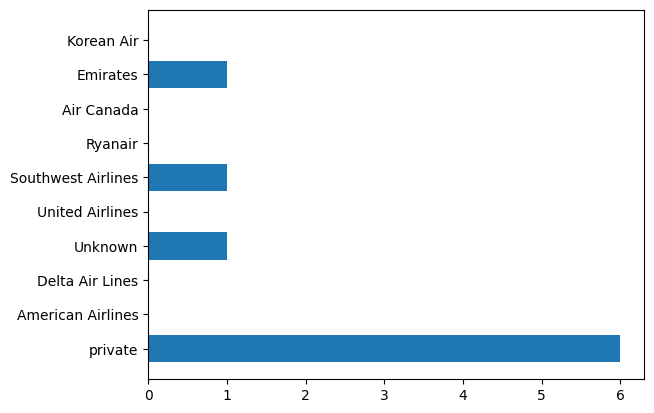

In [65]:
plt.barh(flightData["organisation"],flightData["fat"])



In [66]:
#0ne hot encoding on organisation table.

In [67]:
flightData=pd.get_dummies(flightData,columns=["organisation"],drop_first=True)

In [68]:
flightData

,fat,accident_date,Accident_Year,Accident_Month,organisation_American Airlines,organisation_Delta Air Lines,organisation_Emirates,organisation_Korean Air,organisation_Ryanair,organisation_Southwest Airlines,organisation_United Airlines,organisation_Unknown,organisation_private
0,0,2022-01-12,2022.0,1.0,0,0,0,0,0,0,0,0,1
1,0,2022-04-13,2022.0,4.0,0,0,0,0,0,0,0,0,1
2,6,2022-06-22,2022.0,6.0,0,0,0,0,0,0,0,0,1
3,2,2022-07-15,2022.0,7.0,0,0,0,0,0,0,0,0,1
4,0,2022-09-21,2022.0,9.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,2022-10-23,2022.0,10.0,0,0,0,1,0,0,0,0,0
230,0,2019-05-13,2019.0,5.0,0,0,0,1,0,0,0,0,0
231,0,2019-11-16,2019.0,11.0,0,0,0,1,0,0,0,0,0
232,0,2018-04-09,2018.0,4.0,0,0,0,1,0,0,0,0,0


In [69]:
newflightdata=flightData.drop(["accident_date"],axis=1)

In [70]:
newflightdata

,fat,Accident_Year,Accident_Month,organisation_American Airlines,organisation_Delta Air Lines,organisation_Emirates,organisation_Korean Air,organisation_Ryanair,organisation_Southwest Airlines,organisation_United Airlines,organisation_Unknown,organisation_private
0,0,2022.0,1.0,0,0,0,0,0,0,0,0,1
1,0,2022.0,4.0,0,0,0,0,0,0,0,0,1
2,6,2022.0,6.0,0,0,0,0,0,0,0,0,1
3,2,2022.0,7.0,0,0,0,0,0,0,0,0,1
4,0,2022.0,9.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,2022.0,10.0,0,0,0,1,0,0,0,0,0
230,0,2019.0,5.0,0,0,0,1,0,0,0,0,0
231,0,2019.0,11.0,0,0,0,1,0,0,0,0,0
232,0,2018.0,4.0,0,0,0,1,0,0,0,0,0


In [71]:
#Splitting the input data

In [72]:
x=newflightdata.iloc[:,1:]

In [73]:
x

,Accident_Year,Accident_Month,organisation_American Airlines,organisation_Delta Air Lines,organisation_Emirates,organisation_Korean Air,organisation_Ryanair,organisation_Southwest Airlines,organisation_United Airlines,organisation_Unknown,organisation_private
0,2022.0,1.0,0,0,0,0,0,0,0,0,1
1,2022.0,4.0,0,0,0,0,0,0,0,0,1
2,2022.0,6.0,0,0,0,0,0,0,0,0,1
3,2022.0,7.0,0,0,0,0,0,0,0,0,1
4,2022.0,9.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
229,2022.0,10.0,0,0,0,1,0,0,0,0,0
230,2019.0,5.0,0,0,0,1,0,0,0,0,0
231,2019.0,11.0,0,0,0,1,0,0,0,0,0
232,2018.0,4.0,0,0,0,1,0,0,0,0,0


In [74]:
#Splitting the output data

In [75]:
y=newflightdata.iloc[:,0:1]

In [76]:
y

,fat
0,0
1,0
2,6
3,2
4,0
...,...
229,0
230,0
231,0
232,0


In [77]:
#Splitting the data for tarin and test.

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x_train

,Accident_Year,Accident_Month,organisation_American Airlines,organisation_Delta Air Lines,organisation_Emirates,organisation_Korean Air,organisation_Ryanair,organisation_Southwest Airlines,organisation_United Airlines,organisation_Unknown,organisation_private
154,2019.0,6.0,0,0,0,0,0,0,0,1,0
56,2020.0,10.0,0,0,0,0,0,0,0,0,1
169,2022.0,12.0,0,0,0,0,0,0,1,0,0
71,2019.0,4.0,0,0,0,0,0,0,0,0,1
171,2021.0,9.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110,2020.0,1.0,1,0,0,0,0,0,0,0,0
14,2021.0,8.0,0,0,0,0,0,0,0,0,1
94,2019.0,12.0,0,0,0,0,0,0,0,0,1
183,2018.0,9.0,0,0,0,0,0,0,1,0,0


In [80]:
x_test

,Accident_Year,Accident_Month,organisation_American Airlines,organisation_Delta Air Lines,organisation_Emirates,organisation_Korean Air,organisation_Ryanair,organisation_Southwest Airlines,organisation_United Airlines,organisation_Unknown,organisation_private
221,2021.0,1.0,0,0,1,0,0,0,0,0,0
68,2019.0,3.0,0,0,0,0,0,0,0,0,1
9,2021.0,5.0,0,0,0,0,0,0,0,0,1
197,2018.0,5.0,0,0,0,0,0,1,0,0,0
15,2021.0,9.0,0,0,0,0,0,0,0,0,1
203,2022.0,4.0,0,0,0,0,1,0,0,0,0
25,2020.0,3.0,0,0,0,0,0,0,0,0,1
199,2018.0,10.0,0,0,0,0,0,1,0,0,0
158,2019.0,8.0,0,0,0,0,0,0,0,1,0
130,2021.0,7.0,0,1,0,0,0,0,0,0,0


# Logistic regression model.

In [81]:
lr= LinearRegression()

In [82]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_predict=lr.predict(x_test)

In [84]:
lr_MAE=mean_absolute_error(y_test,y_predict)
lr_MAE

0.2808556141494017

In [85]:
lr_R2_score=r2_score(y_test,y_predict)
lr_R2_score

0.09253044673852329

# Random forest model

In [86]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)


c:\users\nargi\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [87]:
rf_MAE =mean_absolute_error(y_test, rf.predict(x_test))
rf_MAE

0.24672092038396382

In [88]:
rf_R2_score =r2_score(y_test, rf.predict(x_test))
rf_R2_score

0.0014059942913251522

# Gradient Boost model

In [89]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)

c:\users\nargi\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [90]:
gbr_MAE =mean_absolute_error(y_test, gbr.predict(x_test))
gbr_MAE

0.26494181180820736

In [91]:
gbr_R2_score =r2_score(y_test, gbr.predict(x_test))
gbr_R2_score

-0.002299979129585017

In [92]:
#Final output

In [93]:
print("Linear Regression matrics")
print("lr_MAE:",lr_MAE)
print("lr_R2_Score:",lr_R2_score)
print("\n")
print("Random Forest Regressor matrics")
print("rf_MAE:",rf_MAE)
print("rf_R2_score:",rf_R2_score)
print("\n")
print("Gradient Boosting Regressor matrics")
print("gbr_MAE:",gbr_MAE)
print("gbr_R2_score:",gbr_R2_score)

Linear Regression matrics
lr_MAE: 0.2808556141494017
lr_R2_Score: 0.09253044673852329


Random Forest Regressor matrics
rf_MAE: 0.24672092038396382
rf_R2_score: 0.0014059942913251522


Gradient Boosting Regressor matrics
gbr_MAE: 0.26494181180820736
gbr_R2_score: -0.002299979129585017
